## Introduction to project





 


<h3> Content: </h3>



* [Data cleaning and first exploration](#12)
* [EDA](#13)
* [Model 1 - Benchmark](#15)
* [Model 2](#16)
* [Model 3](#17)
* [Model 4 - With VIF & KNN](#18)
* [Model 5](#19)
* [Model 6](#20)
* [Result Analysis & Visualization](#21)
* [Model Performance for Properties above 650k](#22)
* [Conclusion](#23)





In [371]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regplot
import warnings
warnings.filterwarnings('ignore')

<a id ='12' ></a>
### Data cleaning and first exploration

In [3]:
df_estate = pd.read_excel('regression_data.xls')
df_estate

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
#checking columns
for columns in df_estate.columns:
    print(columns)

id
date
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
price


In [5]:
df_estate.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [6]:
# to keep an original version as a backup I will create a copy
dff_estate = df_estate.copy()

In [7]:
#filtering out column date
df_estate = df_estate.filter(regex="[^date]")

In [8]:
#checking data types
df_estate.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [9]:
#checking nulls
df_estate.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [10]:
df_estate['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [11]:
df_estate['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [12]:
df_estate['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
#house id is a unique identifier
df_estate.set_index('id')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101


In [14]:
df_estate.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [15]:
# treating zip code as categorical
df_estate['zipcode'] = df_estate['zipcode'].astype(str)

In [16]:
df_estate.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [17]:
#checking categorical data
cat_estate = df_estate.select_dtypes('object')
cat_estate

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
21592,98103
21593,98146
21594,98144
21595,98027


In [18]:
df_estate = pd.get_dummies(df_estate)

In [19]:
cat_estate.describe()

,zipcode
count,21597
unique,70
top,98103
freq,602


<a id ='13' ></a>
### EDA

In [20]:
#checking correlation before encoding categorical features
dff_estate.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951


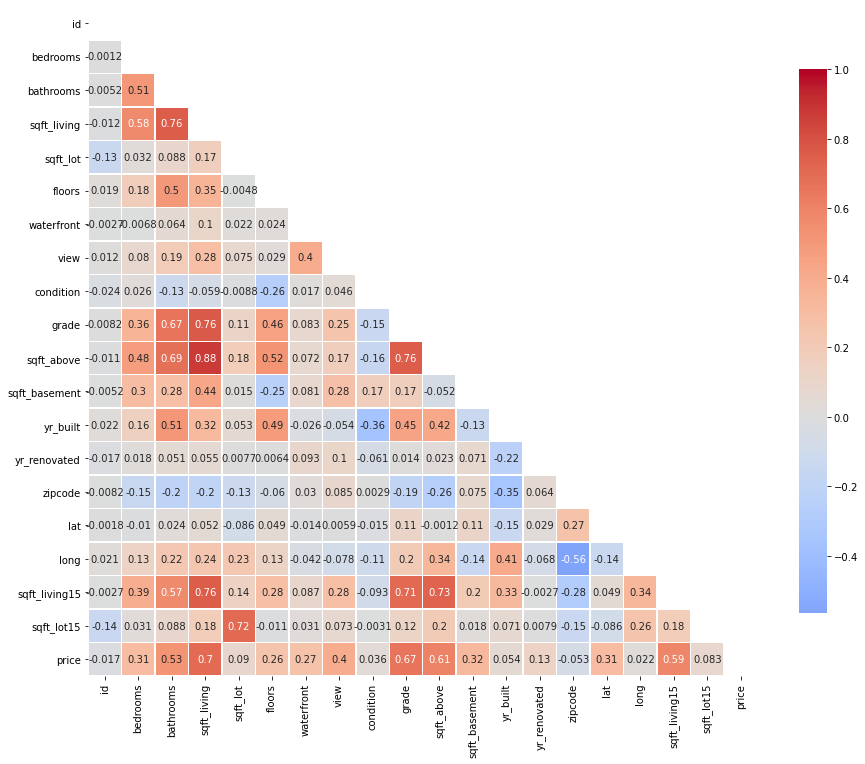

In [21]:
#Checking correlations between variables, especially between zipcode and price
corr = dff_estate.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 20))

ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

<h5>According to the heatmap zip code is not a well-correlated variable, but we know(from Tableau) that location of the house/apartment has an influance on the price. This feature will require further investigation.<h5/>

In [22]:
#Checking the correlaction for dataframe with a zipcode changed to a categorical variable
df_estate.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,0.5,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,370.0,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.0,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
...,...,...,...,...,...,...,...,...
zipcode_98177,21597.0,1.180720e-02,1.080200e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
zipcode_98178,21597.0,1.213131e-02,1.094747e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
zipcode_98188,21597.0,6.297171e-03,7.910630e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
zipcode_98198,21597.0,1.296476e-02,1.131250e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [23]:
corr_data = df_estate.corr()
correlations_matrix = corr_data.corr()
correlations_matrix

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,1.000000,-0.028071,-0.023707,-0.052394,-0.289357,0.022927,-0.033362,-0.032695,-0.057455,-0.027824,...,0.007958,0.034416,0.019334,-0.041359,-0.092282,-0.051202,-0.014226,-0.002719,0.048003,-0.090444
bedrooms,-0.028071,1.000000,0.856769,0.875847,0.175858,0.544609,0.116266,0.370518,-0.142475,0.786235,...,-0.158323,-0.083642,-0.105739,-0.036537,-0.204678,0.021851,-0.106063,-0.059275,-0.113609,-0.008699
bathrooms,-0.023707,0.856769,1.000000,0.959963,0.244492,0.795481,0.190953,0.444019,-0.360787,0.952744,...,-0.206657,-0.098800,-0.164929,-0.078307,-0.265567,0.010263,-0.167904,-0.103584,-0.145722,0.009487
sqft_living,-0.052394,0.875847,0.959963,1.000000,0.311044,0.680792,0.246882,0.535288,-0.257053,0.962541,...,-0.190296,-0.104171,-0.147248,-0.048042,-0.244041,0.047755,-0.151078,-0.103336,-0.138251,0.026532
sqft_lot,-0.289357,0.175858,0.244492,0.311044,1.000000,0.116358,0.074206,0.163260,-0.089365,0.264031,...,-0.075800,-0.044075,-0.081724,-0.020238,-0.058151,-0.032683,-0.060019,-0.040683,-0.047881,-0.078717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode_98177,-0.051202,0.021851,0.010263,0.047755,-0.032683,-0.060325,0.037845,0.165618,0.055830,0.044220,...,-0.005085,-0.012859,0.021953,-0.001556,-0.015953,1.000000,-0.012156,-0.016468,-0.020440,0.032102
zipcode_98178,-0.014226,-0.106063,-0.167904,-0.151078,-0.060019,-0.183873,0.050494,0.022257,0.042943,-0.186251,...,0.023142,0.010004,0.001100,0.011659,0.027371,-0.012156,1.000000,0.011486,0.020334,-0.010827
zipcode_98188,-0.002719,-0.059275,-0.103584,-0.103336,-0.040683,-0.108702,-0.037506,-0.059660,0.016265,-0.120056,...,0.014841,0.008330,-0.006082,0.005728,0.020050,-0.016468,0.011486,1.000000,0.015500,-0.012676
zipcode_98198,0.048003,-0.113609,-0.145722,-0.138251,-0.047881,-0.150855,0.063367,0.043554,0.056873,-0.152819,...,0.026809,0.014742,-0.017191,0.020768,0.025566,-0.020440,0.020334,0.015500,1.000000,-0.014850


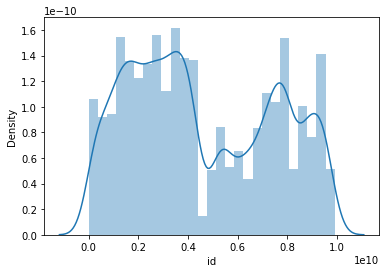

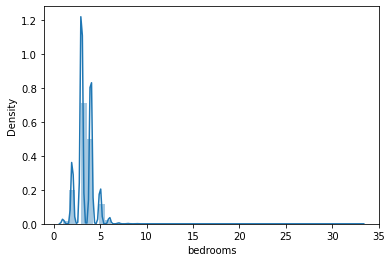

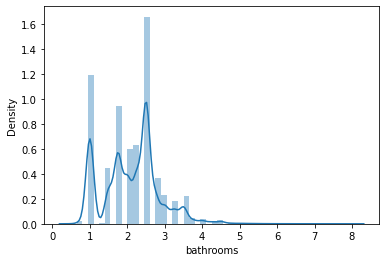

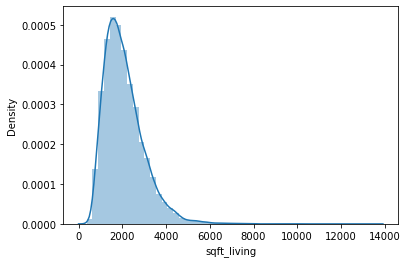

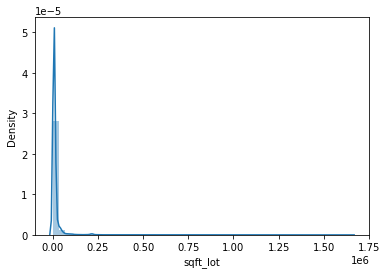

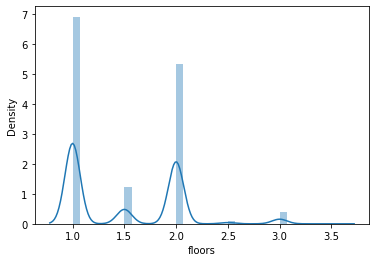

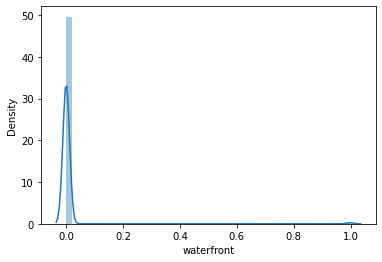

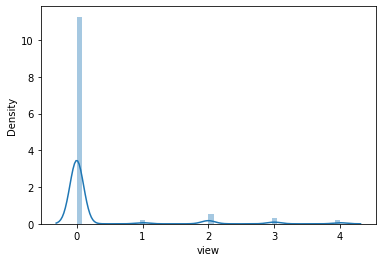

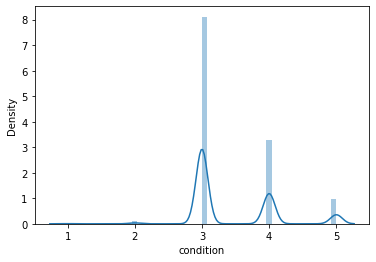

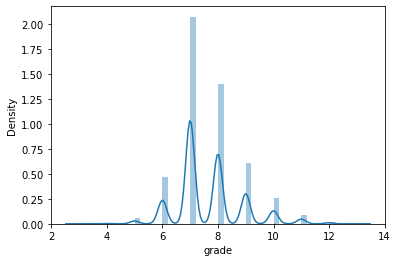

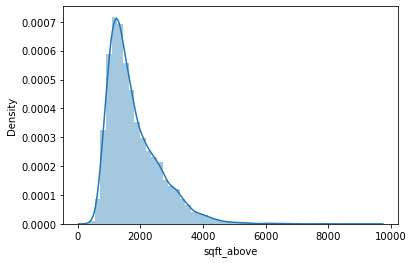

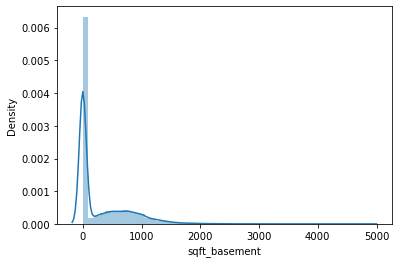

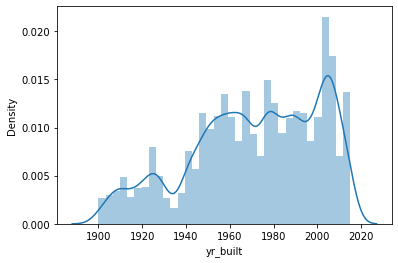

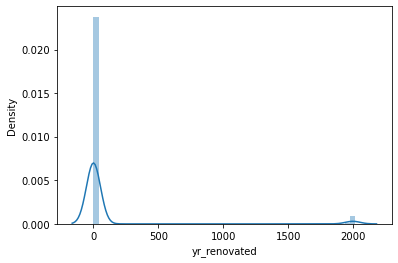

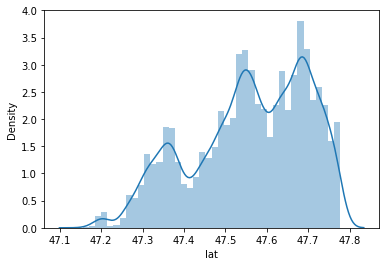

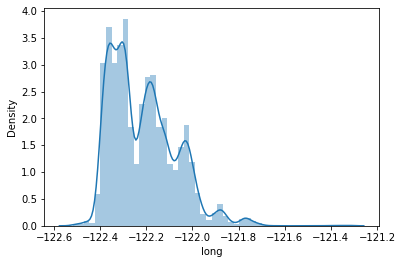

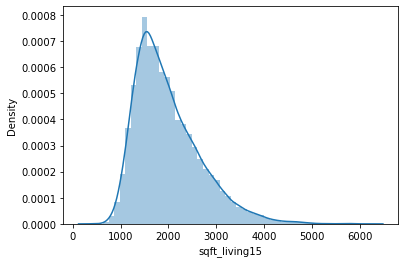

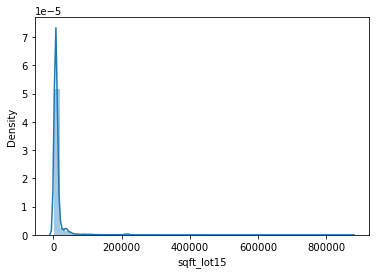

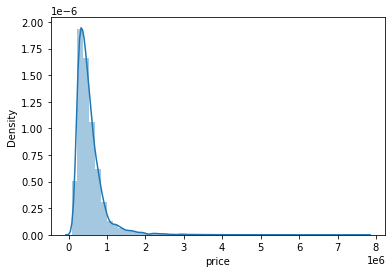

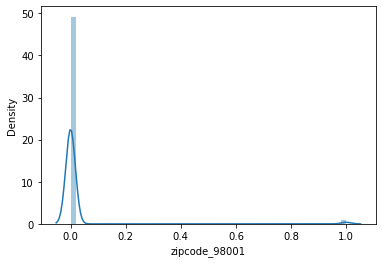

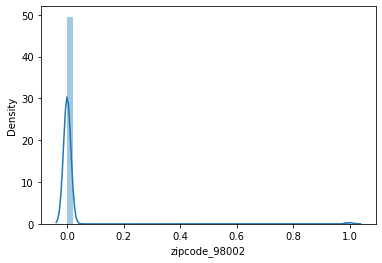

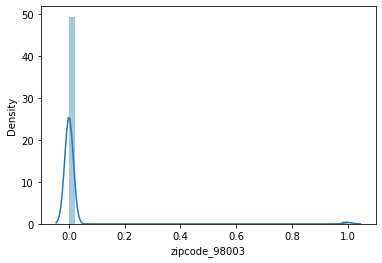

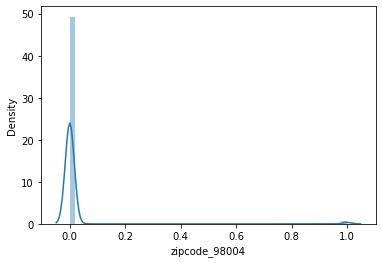

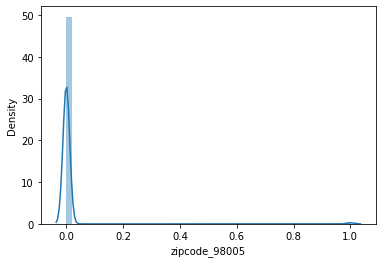

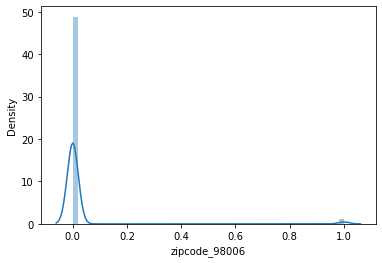

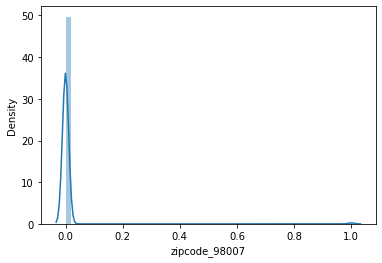

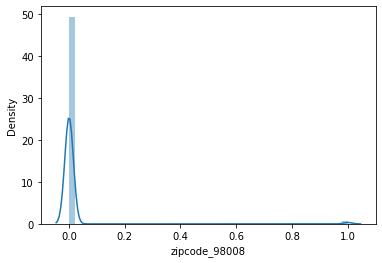

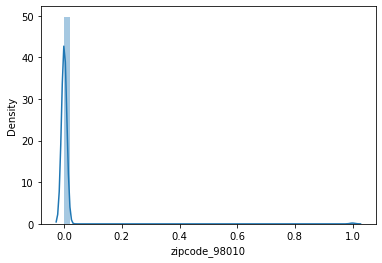

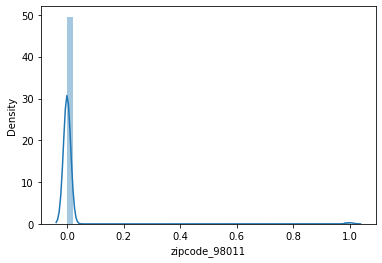

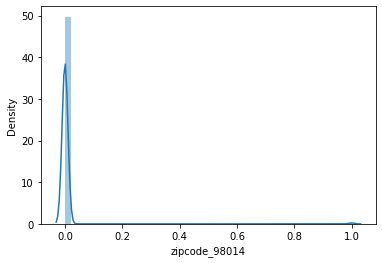

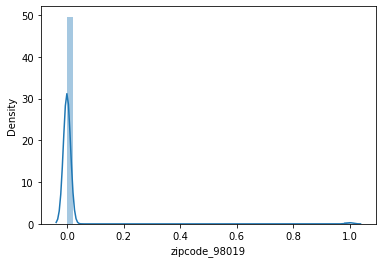

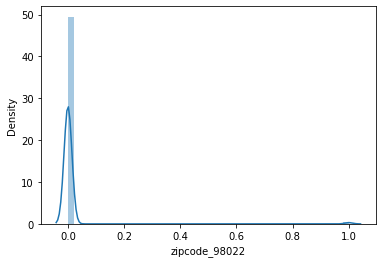

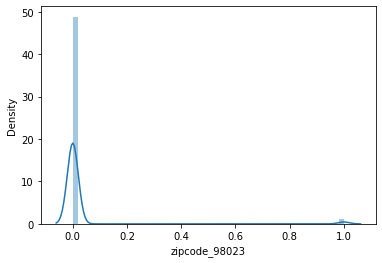

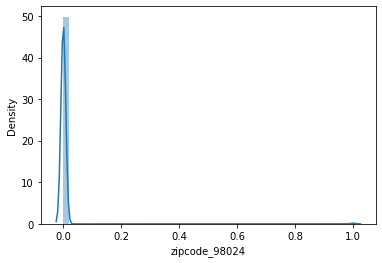

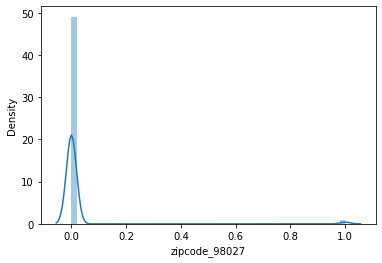

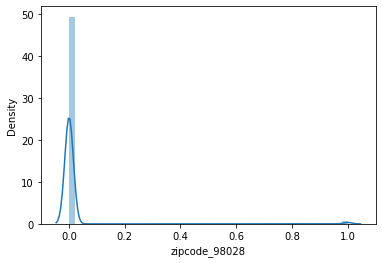

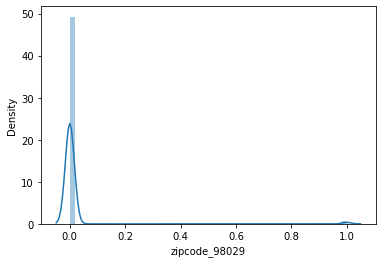

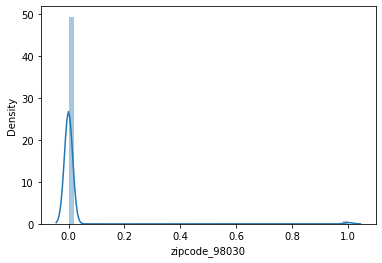

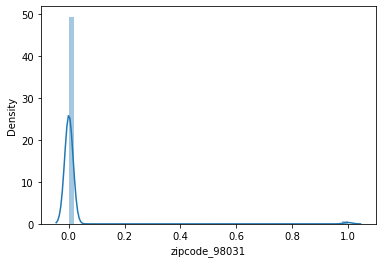

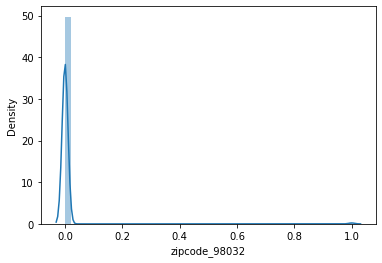

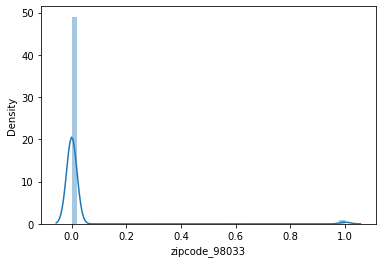

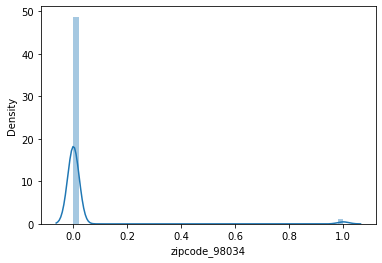

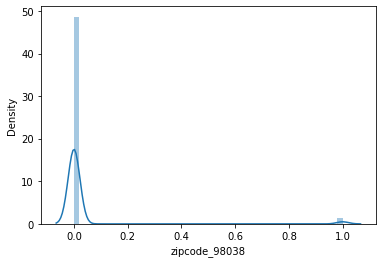

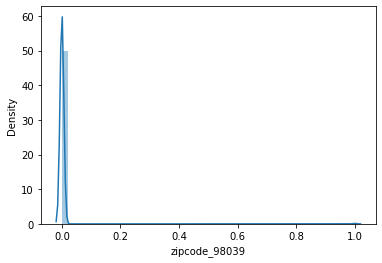

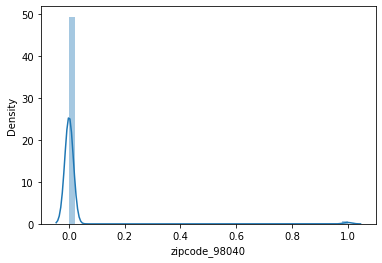

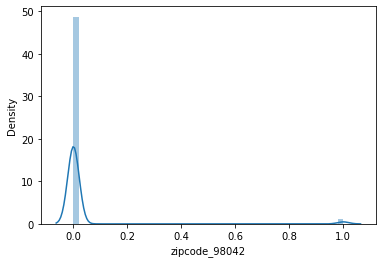

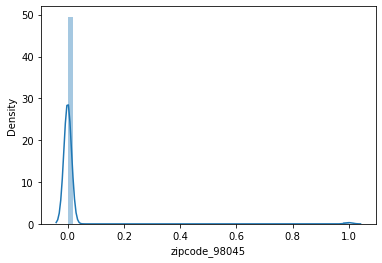

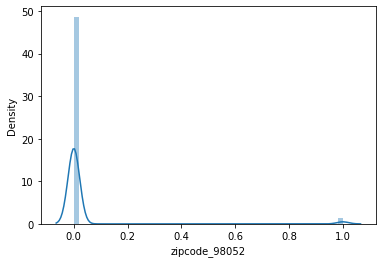

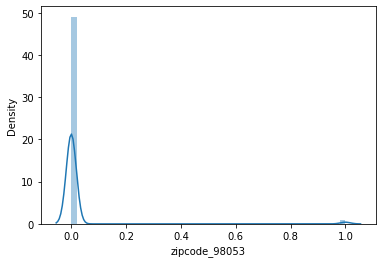

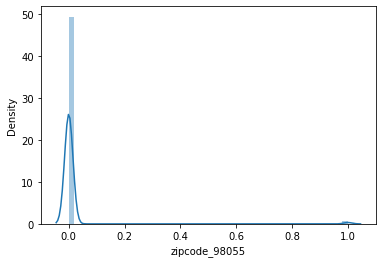

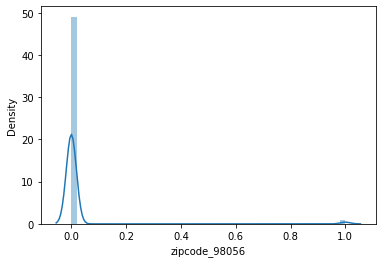

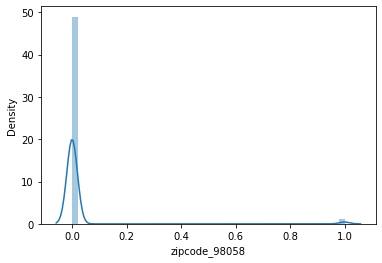

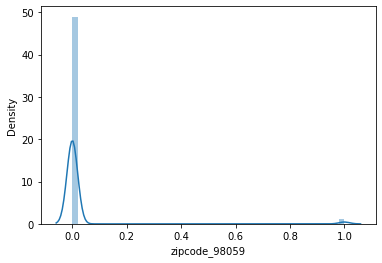

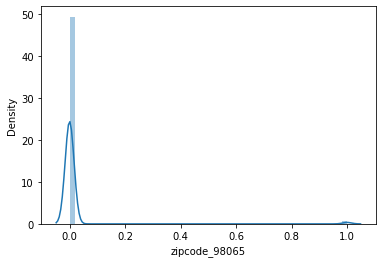

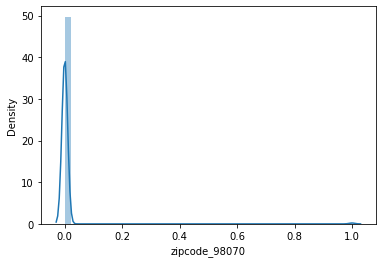

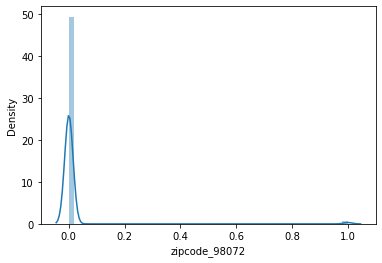

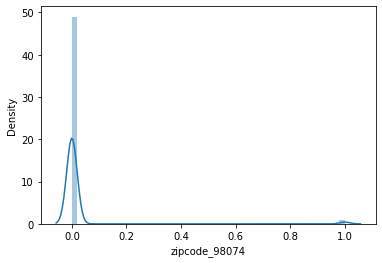

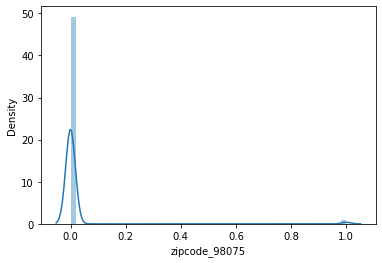

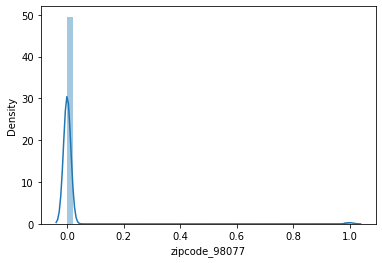

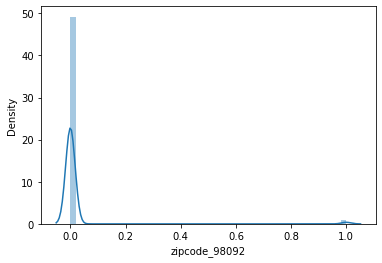

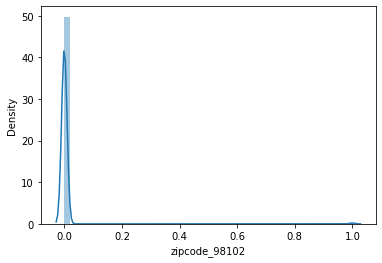

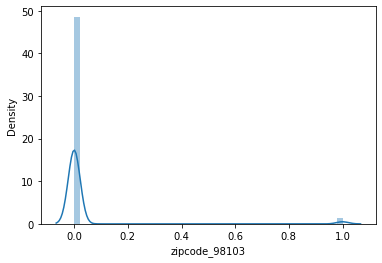

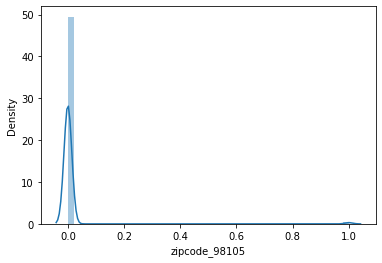

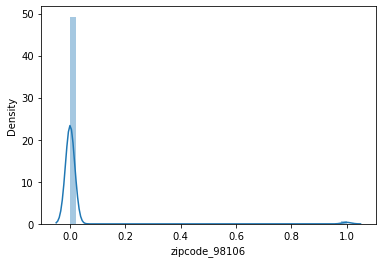

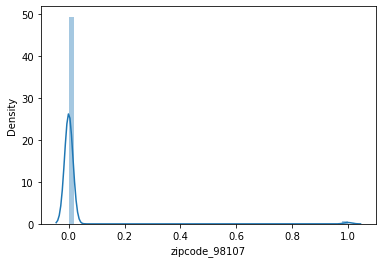

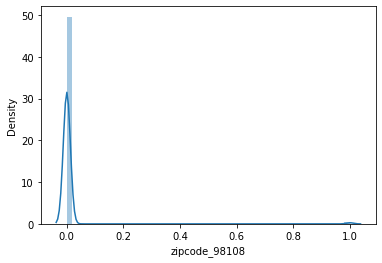

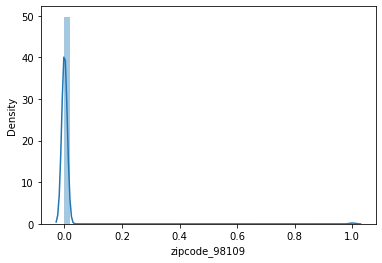

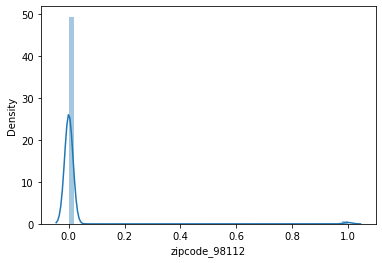

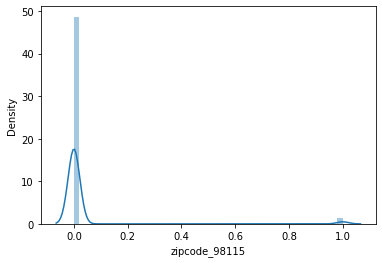

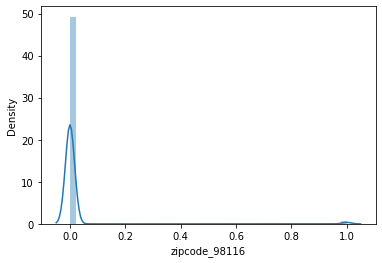

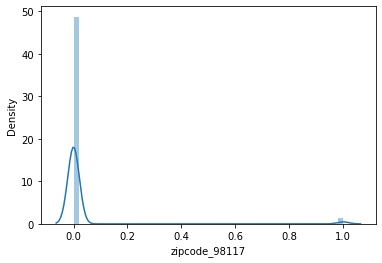

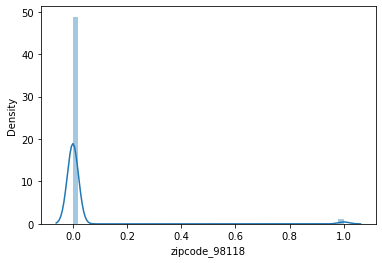

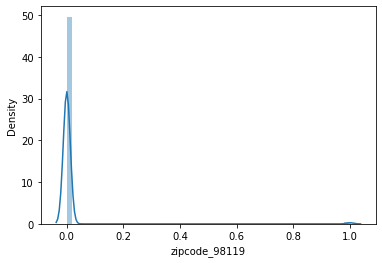

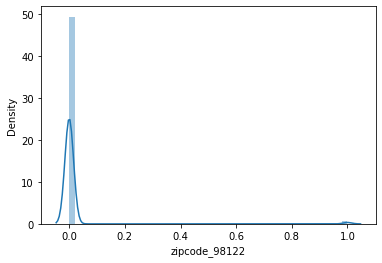

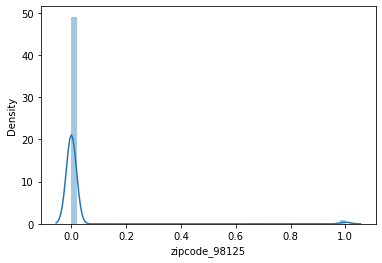

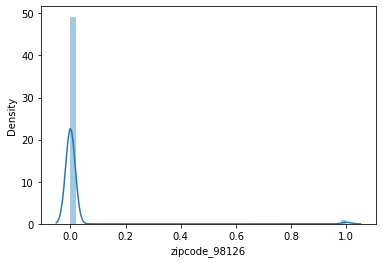

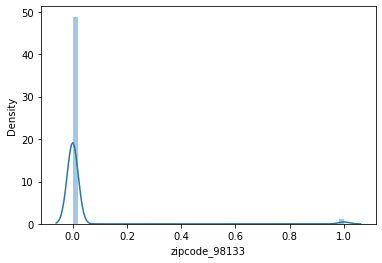

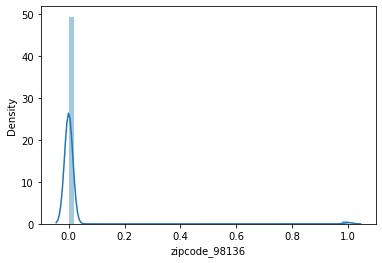

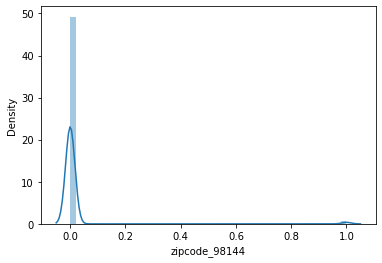

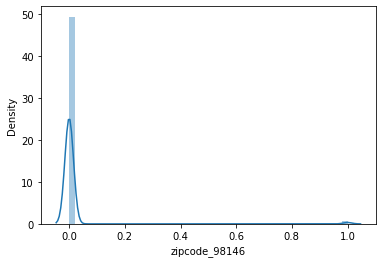

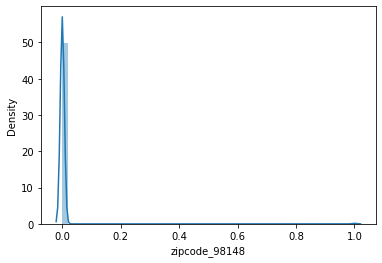

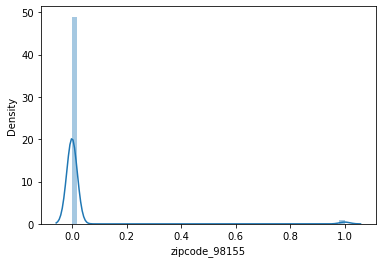

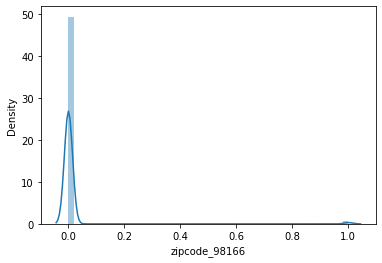

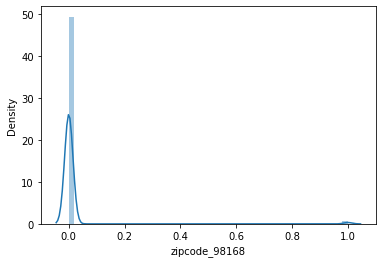

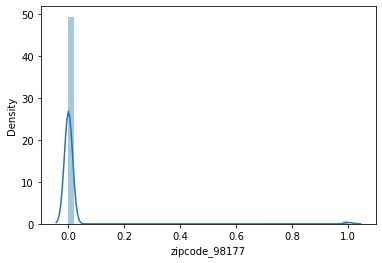

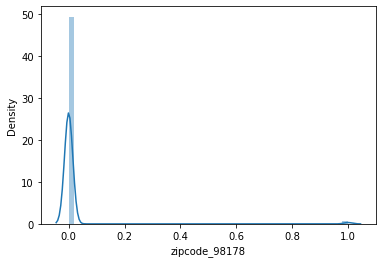

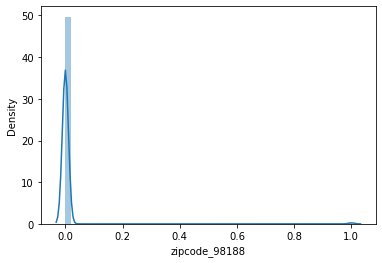

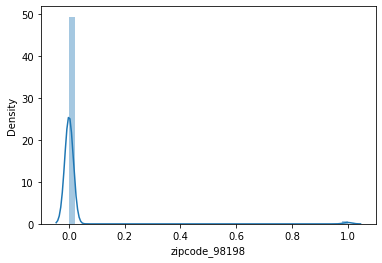

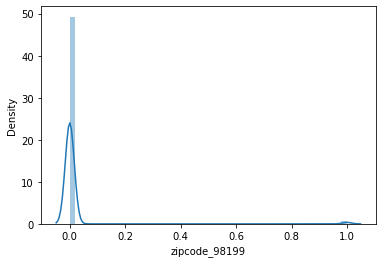

In [24]:
for column in df_estate.columns:
    sns.distplot(df_estate[column])
    plt.show()

In [25]:
#mask = np.zeros_like(correlations_matrix)
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(20, 20))
#ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
#plt.show()

<a id ='15' ></a>
### Model 1 - Benchmark

    * Running the first model and setting benchmark

In [26]:
model_1 = dff_estate.copy()

In [27]:
model_1 = model_1.filter(regex="[^date]")

In [28]:
# splitting data
X = model_1.drop('price', axis=1)
y = model_1['price']

# train and test split for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
model_1.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
lr.score(X_test, y_test)

0.6911583603392557

In [32]:
predictions = lr.predict(X_test)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)


(0.6911583603392557, 125781.2602421811, 200539.79520470835)

<a id ='16' ></a>
### Model 2
    * Second model with zip code transformed to categorical feature

In [33]:
# Make a copy of our data
model_2 = df_estate.copy()

In [34]:
#Set 'id' as the new index for the data
model_2.set_index('id')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,0,0,0,0,0,1,0,0,0
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,0,0,0,0,0,0,0,0,0,0
6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,1,0,0,0,0,0,0,0,0,0
1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# splitting data
X = model_2.drop('price', axis=1)
y = model_2['price']

# train and test split for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
lr.score(X_test, y_test)

0.7942469587272257

In [38]:
predictions = lr.predict(X_test)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)


(0.7942469587272257, 97365.29728670337, 163683.82832937496)

Model got better when zipcode was changed to categorical variable

<a id ='17' ></a>
### Model 3
    *Feature engineering -improved model by further removing outlier from target- price.

In [39]:
#Make a copy of our data
model_3 = model_2.copy()

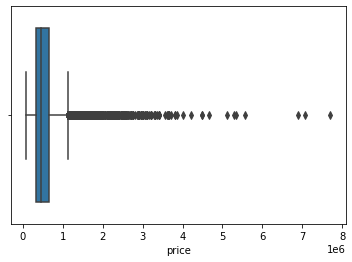

In [363]:
#outliers in price
sns.boxplot(model_3['price'])
plt.show()

In [44]:
model_3.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
                   ...   
zipcode_98002   -0.080332
zipcode_98168   -0.091703
zipcode_98001   -0.091959
zipcode_98042   -0.100363
zipcode_98023   -0.106147
Name: price, Length: 89, dtype: float64

In [45]:
model_3['price'].value_counts().unique()

array([172, 159, 152, 150, 148, 145, 138, 133, 131, 130, 120, 119, 117,
       113, 111, 110, 109, 107, 105, 103, 101,  98,  97,  96,  95,  94,
        93,  92,  91,  90,  89,  88,  87,  86,  85,  83,  82,  81,  80,
        79,  78,  76,  75,  74,  73,  72,  71,  70,  69,  66,  64,  62,
        60,  58,  57,  56,  55,  54,  53,  52,  51,  49,  48,  47,  44,
        43,  42,  41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,
        30,  29,  28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,
        17,  16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,
         4,   3,   2,   1], dtype=int64)

In [43]:
model_3.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
                  ...   
zipcode_98177      uint8
zipcode_98178      uint8
zipcode_98188      uint8
zipcode_98198      uint8
zipcode_98199      uint8
Length: 89, dtype: object

In [47]:
#Function to removing outliers 
def remove_outliers(model_3, threshold=1.5, in_columns=model_3.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(model_3[column],75)
            lower = np.percentile(model_3[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            model_3 = model_3[(model_3[column]>lower_limit) & (model_3[column]<upper_limit)]
    return model_3

In [52]:
model_3 = remove_outliers(model_3, threshold=1.5, in_columns=['price'])

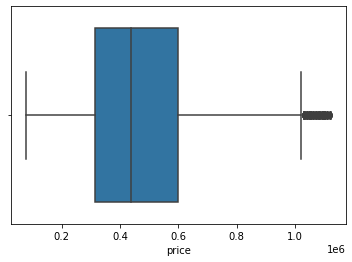

In [53]:
#after outliers are removed
sns.boxplot(model_3['price'])
plt.show()

In [58]:
# splitting data
X = model_3.drop('price', axis=1)
y = model_3['price']

In [59]:
# train and test split for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
lr.score(X_test, y_test)

0.834495342973674

In [62]:
pred = lr.predict(X_test)
r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test, pred, squared=False)


(0.834495342973674, 61324.43654687, 83105.81492809032)

Model got even better after we removed outliers from price and also leaving zipcode as categorical variable

<a id ='18' ></a>
### Model 4 - With VIF & KNN
    * Feature Selection - checking multicolinearity with VIF method

In [55]:
#improving the model - VIF
model_4 = model_3.copy()

In [56]:
model_4.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.621329
sqft_living      0.604023
sqft_living15    0.544809
sqft_above       0.508635
                   ...   
zipcode_98042   -0.141787
zipcode_98002   -0.142789
zipcode_98001   -0.146286
zipcode_98168   -0.164547
zipcode_98023   -0.167518
Name: price, Length: 89, dtype: float64

In [57]:
numericals = model_4.select_dtypes(np.number).drop(columns=['price'], axis =1)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


vif_numericals = add_constant(numericals)
vif_numericals

,const,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.0,7129300520,3,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,1.0,6414100192,3,2.25,2570,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,1.0,5631500400,2,1.00,770,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2487200875,4,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1954400510,3,2.00,1680,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,263000018,3,2.50,1530,1131,3.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21593,1.0,6600060120,4,2.50,2310,5813,2.0,0,0,3,...,1,0,0,0,0,0,0,0,0,0
21594,1.0,1523300141,2,0.75,1020,1350,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21595,1.0,291310100,3,2.50,1600,2388,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [59]:
threshold = 30

while True:
    # calculates the vif
    values = [variance_inflation_factor(np.array(vif_numericals), i)
              for i in range(len(vif_numericals.columns))][1:]
    display(pd.DataFrame(values, index=vif_numericals.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif_numericals.columns[col_index]
        # drops that column
        vif_numericals = vif_numericals.drop(column_name, axis=1)
    else:
        break

vif_numericals

,0
id,1.089347
yr_renovated,1.151597
waterfront,1.187982
view,1.298146
condition,1.313104
...,...
zipcode_98070,inf
zipcode_98072,inf
zipcode_98077,inf
zipcode_98106,inf


,0
id,1.089347e+00
yr_renovated,1.151597e+00
waterfront,1.187982e+00
view,1.298146e+00
condition,1.313104e+00
...,...
zipcode_98070,1.286743e+15
zipcode_98092,2.251800e+15
zipcode_98039,2.251800e+15
zipcode_98077,4.503600e+15


,0
zipcode_98039,1.039790
id,1.089347
yr_renovated,1.151597
waterfront,1.187982
view,1.298146
...,...
zipcode_98042,9.901424
zipcode_98038,11.142366
zipcode_98023,12.930630
long,34.661088


,0
zipcode_98039,1.039473
id,1.089194
yr_renovated,1.151493
waterfront,1.187555
view,1.298016
...,...
zipcode_98103,5.856143
zipcode_98045,5.896158
zipcode_98117,5.922597
zipcode_98038,6.098861


,0
zipcode_98039,1.038952
id,1.089093
yr_renovated,1.151241
waterfront,1.187317
view,1.297862
...,...
zipcode_98052,4.570875
zipcode_98115,4.602018
zipcode_98038,4.791141
zipcode_98103,4.885028


,const,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.0,7129300520,3,1.00,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,1.0,6414100192,3,2.25,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,1.0,5631500400,2,1.00,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2487200875,4,3.00,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1954400510,3,2.00,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,263000018,3,2.50,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
21593,1.0,6600060120,4,2.50,5813,2.0,0,0,3,8,...,1,0,0,0,0,0,0,0,0,0
21594,1.0,1523300141,2,0.75,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
21595,1.0,291310100,3,2.50,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X = vif_numericals
y = model_4['price']

##### Linear Regression

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
lr.score(X_test, y_test)

0.843580863769963

#### KNN - K Nearest Neighbors

In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [65]:
knn.score(X_test, y_test)

0.485902517022093

In [66]:
predictions = lr.predict(X_test)

In [67]:
predictions = lr.predict(X_test)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)


(0.843580863769963, 0.12829094079381914, 0.1734908390525471)

<a id ='19' ></a>
### Model 5
    * Further model improvement by dealing with a zip code, longitude and latitude - there would be a significant relationship with distances from Seattle and Bellevue city centers because they are the biggest hubs of jobs and economic activity in the  area.

In [325]:
# Make a copy of the original data
model_5 = dff_estate.copy()

In [326]:
#Combine the longitude and latitude to get the location of each house
model_5['lat_long'] = tuple(zip(model_5.lat, model_5.long))

In [327]:
# Locations of Seattle and Bellevue by longitude and latitude
seattle = [47.6080, -122.3351]
bellevue = [47.6104, -122.2007]

In [328]:
# Function to calculate distance of each house from Seattle & Bellevue
from haversine import haversine

seattle_distance = []
for i in model_5['lat_long']:
    calculated_dist = round(haversine(seattle, i, unit = 'km'),2)
    seattle_distance.append(calculated_dist)
model_5['distance_from_seattle'] = seattle_distance
bellevue_distance = []
for i in model_5['lat_long']:
    calculated_dist_bell = round(haversine(bellevue, i, unit = 'km'),2)
    bellevue_distance.append(calculated_dist_bell)
model_5['distance_from_bellevue'] = bellevue_distance

In [329]:
# Get the minimum distance between the two calculated locations
model_5['distance_from_epicenter'] = model_5[['distance_from_seattle', 'distance_from_bellevue']].min(axis = 1)

In [330]:
model_5

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,lat_long,distance_from_seattle,distance_from_bellevue,distance_from_epicenter
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,221900,"(47.5112, -122.257)",12.26,11.81,11.81
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,538000,"(47.721, -122.319)",12.62,15.16,12.62
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,180000,"(47.7379, -122.233)",16.34,14.38,14.38
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,604000,"(47.5208, -122.393)",10.62,17.53,10.62
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,510000,"(47.6168, -122.045)",21.77,11.69,11.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,360000,"(47.6993, -122.346)",10.18,14.70,10.18
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,400000,"(47.5107, -122.362)",11.01,16.41,11.01
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,402101,"(47.5944, -122.299)",3.10,7.58,3.10
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,400000,"(47.5345, -122.069)",21.57,12.99,12.99


In [331]:
model_5.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'lat_long',
       'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_epicenter'],
      dtype='object')

##### Linear Regression

In [332]:
#Filter out date and the generated lat_long column as we don't need them again
model_5 = model_5.filter(regex="[^lat_long]")
model_5 = model_5.filter(regex="[^date]")

In [333]:
# Set 'id' as the index of our data
model_5 = model_5.set_index('id')

In [334]:
model_5

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue,distance_from_epicenter
id,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,12.26,11.81,11.81
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12.62,15.16,12.62
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,16.34,14.38,14.38
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,10.62,17.53,10.62
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,21.77,11.69,11.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000,10.18,14.70,10.18
6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000,11.01,16.41,11.01
1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101,3.10,7.58,3.10


In [335]:
# Converting zip code to categorical feature
model_5['zipcode'] = model_5['zipcode'].astype(str)

In [336]:
#Also remove outliers from the target variable - price
model_5 = remove_outliers(model_5, threshold=1.5, in_columns=['price'])

In [337]:
# See correlation between price and newly created features
model_5.corr()['price'].sort_values(ascending=False)

price                      1.000000
grade                      0.630980
sqft_living                0.621362
sqft_living15              0.562024
sqft_above                 0.529931
bathrooms                  0.454959
bedrooms                   0.294144
floors                     0.273360
view                       0.237079
sqft_basement              0.233846
sqft_lot                   0.093554
yr_renovated               0.084187
sqft_lot15                 0.082413
yr_built                   0.061264
waterfront                 0.051724
condition                  0.037204
distance_from_seattle     -0.308160
distance_from_epicenter   -0.444485
distance_from_bellevue    -0.456163
Name: price, dtype: float64

In [338]:
# X - y split
X = model_5.drop('price', axis=1)
y = model_5['price']

In [339]:
# Seperate numericals and categoricals
X_cat = X.select_dtypes('object')
X_num = X.select_dtypes(np.number)

In [340]:
# Get dummies for numericals - zipcode
X_cat = pd.get_dummies(X_cat)

In [341]:
# Join X variables back
X = pd.concat([X_num, X_cat], axis=1)

In [342]:
X.shape

(20439, 88)

In [343]:
# Train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [344]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [345]:
preds = model.predict(X_test)
r2_score(y_test, preds), mean_absolute_error(y_test, preds), mean_squared_error(y_test, preds, squared=False)


(0.8366589285024968, 60664.366686826645, 82560.82105383449)

This approach gave us a better model from model 3 as the errors are further reduced and r-squared score got a little bit higher 

<a id ='19' ></a>
### Model 5B - With scaled features
    * Final model improvement by scaling the variables -  transform the target variable price by base 10 log and transform the other numerical variables by natural log.

In [346]:
#Function for transformation using base 10 log
import math

def log_transform2(x):
    if np.isfinite(x) and x!=0:
        return math.log10(x)
    else:
        return np.NAN

In [347]:
# apply log10 transformation to target - price - because of its distribution
y = y.apply(log_transform2)

In [349]:
# Function for transformation using natural log
log_transform = lambda x: np.log(x) if np.isfinite(x) and x!=0 else np.NAN


def log_scaled(df):
    numeric_cols = df.select_dtypes(np.number).columns
    for column in numeric_cols:
        df[column] = df[column].apply(log_transform).fillna(df[column].mean()) 
    return df

In [351]:
# Apply natural log to other features - Numericals
X_num_scaled = log_scaled(X_num)

In [353]:
X_num_scaled

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,distance_from_seattle,distance_from_bellevue,distance_from_epicenter
id,,,,,,,,,,,,,,,,,,
7129300520,1.098612,0.000000,7.073270,8.639411,0.000000,0.002984,0.172171,1.098612,1.945910,7.073270,267.071236,7.578145,74.783453,7.200425,8.639411,2.506342,2.468947,2.468947
6414100192,1.098612,0.810930,7.851661,8.887653,0.693147,0.002984,0.172171,1.098612,1.945910,7.682482,5.991465,7.576097,7.596392,7.432484,8.941022,2.535283,2.718660,2.535283
5631500400,0.693147,0.000000,6.646391,9.210340,0.000000,0.002984,0.172171,1.098612,1.791759,6.646391,267.071236,7.566828,74.783453,7.908387,8.994917,2.793616,2.665838,2.665838
2487200875,1.386294,1.098612,7.580700,8.517193,0.000000,0.002984,0.172171,1.609438,1.945910,6.956545,6.813445,7.583248,74.783453,7.215240,8.517193,2.362739,2.863914,2.362739
1954400510,1.098612,0.693147,7.426549,8.997147,0.000000,0.002984,0.172171,1.098612,2.079442,7.426549,267.071236,7.594381,74.783453,7.495542,8.923058,3.080533,2.458734,2.458734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,1.098612,0.916291,7.333023,7.030857,1.098612,0.002984,0.172171,1.098612,2.079442,7.333023,267.071236,7.605392,74.783453,7.333023,7.319202,2.320425,2.687847,2.320425
6600060120,1.386294,0.916291,7.745003,8.667852,0.693147,0.002984,0.172171,1.098612,2.079442,7.745003,267.071236,7.607878,74.783453,7.512071,8.881836,2.398804,2.797891,2.398804
1523300141,0.693147,-0.287682,6.927558,7.207860,0.693147,0.002984,0.172171,1.098612,1.945910,6.927558,267.071236,7.605392,74.783453,6.927558,7.604396,1.131402,2.025513,1.131402


In [355]:
# Combine the scaled features with the dummified zipcodes
X_5b = pd.concat([X_num_scaled, X_cat], axis=1)
X_5b

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,
7129300520,1.098612,0.000000,7.073270,8.639411,0.000000,0.002984,0.172171,1.098612,1.945910,7.073270,...,0,0,0,0,0,0,1,0,0,0
6414100192,1.098612,0.810930,7.851661,8.887653,0.693147,0.002984,0.172171,1.098612,1.945910,7.682482,...,0,0,0,0,0,0,0,0,0,0
5631500400,0.693147,0.000000,6.646391,9.210340,0.000000,0.002984,0.172171,1.098612,1.791759,6.646391,...,0,0,0,0,0,0,0,0,0,0
2487200875,1.386294,1.098612,7.580700,8.517193,0.000000,0.002984,0.172171,1.609438,1.945910,6.956545,...,0,0,0,0,0,0,0,0,0,0
1954400510,1.098612,0.693147,7.426549,8.997147,0.000000,0.002984,0.172171,1.098612,2.079442,7.426549,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,1.098612,0.916291,7.333023,7.030857,1.098612,0.002984,0.172171,1.098612,2.079442,7.333023,...,0,0,0,0,0,0,0,0,0,0
6600060120,1.386294,0.916291,7.745003,8.667852,0.693147,0.002984,0.172171,1.098612,2.079442,7.745003,...,1,0,0,0,0,0,0,0,0,0
1523300141,0.693147,-0.287682,6.927558,7.207860,0.693147,0.002984,0.172171,1.098612,1.945910,6.927558,...,0,0,0,0,0,0,0,0,0,0


In [358]:
X_5b.shape

(20439, 88)

In [359]:
# Train - test split
X_5b_train, X_5b_test, y_train, y_test = train_test_split(X_5b, y, test_size=0.20, random_state=42)

In [360]:
# Train model
model_ = LinearRegression()
model_.fit(X_5b_train, y_train)

LinearRegression()

In [361]:
# Unscaling price
pred_5b = model_.predict(X_5b_test)
r2_score(10**y_test, 10**pred_5b),mean_absolute_error(10**y_test, 10**pred_5b), mean_squared_error(10**y_test, 10**pred_5b, squared=False)

(0.8475802852043212, 56441.373027357935, 79752.97190484699)

Scaling price with Log10 obviously improved our model from what it was in model 5. This is our best model so far! - Model 5b

<a id ='20' ></a>
### Model 6- With selected features only
    * Last attempt to possibly improve model by selecting only features that have higher correlations with target variable - price

In [145]:
# Make a copy of our data with generated variables
model_6 = model_5.copy()
model_6

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,distance_from_seattle,distance_from_bellevue,distance_from_epicenter
id,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,12.26,11.81,11.81
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12.62,15.16,12.62
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,16.34,14.38,14.38
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,10.62,17.53,10.62
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,21.77,11.69,11.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000,10.18,14.70,10.18
6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000,11.01,16.41,11.01
1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101,3.10,7.58,3.10


In [146]:
# Choose interested features
model_6 = model_6.filter(items=['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
       'sqft_living15', 'price', 'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_epicenter' ])

In [150]:
# X - y split
X = model_6.drop('price', axis=1)
y = model_6['price']

In [151]:
# Seperate numericals and categoricals
X_cat = X.select_dtypes('object')
X_num = X.select_dtypes(np.number)

In [153]:
# Get dummies for numericals - zipcode
X_cat = pd.get_dummies(X_cat)

In [155]:
# Join X variables back
X = pd.concat([X_num, X_cat], axis=1)

In [157]:
# Train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [158]:
# Train model
lr6 = LinearRegression()
lr6.fit(X_train, y_train)

LinearRegression()

In [159]:
pred_6 = lr6.predict(X_test)
r2_score(y_test, pred_6), mean_absolute_error(y_test, pred_6), mean_squared_error(y_test, pred_6, squared=False)

(0.8204512680984831, 63143.18252592917, 86560.04515016585)

Choosing only higher correlated features for our model didn't make our model better.

<a id ='21' ></a>
### Result Analysis - Using our best model - 5b

In [365]:
import math

results = pd.DataFrame()
results['true'] = 10**y_test
results['prediction'] = 10**pred_5b
results['residuals'] = results.apply(lambda x: abs(x['true'] - x['prediction']), axis=1)
results['%error'] = results['residuals']/results['true'] * 100
results

,true,prediction,residuals,%error
id,,,,
2895800780,279800.0,3.149329e+05,35132.850301,12.556415
1105000432,224000.0,3.700060e+05,146006.040370,65.181268
6204050040,489900.0,4.783845e+05,11515.524438,2.350587
4070700290,899000.0,6.773843e+05,221615.742530,24.651362
2597530760,905000.0,8.045275e+05,100472.507436,11.101935
...,...,...,...,...
9414100030,975000.0,1.072962e+06,97962.355545,10.047421
2407000110,275000.0,2.691824e+05,5817.569807,2.115480
8856003525,183500.0,1.710892e+05,12410.799104,6.763378


<AxesSubplot:xlabel='true', ylabel='%error'>

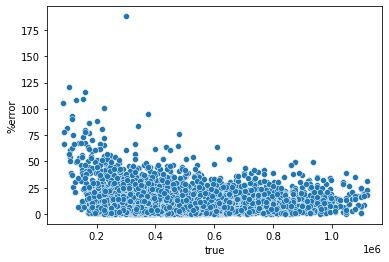

In [189]:
# Show visualization of the error and true price
sns.scatterplot(x= results['true'], y= results['%error'])

<AxesSubplot:xlabel='true', ylabel='%error'>

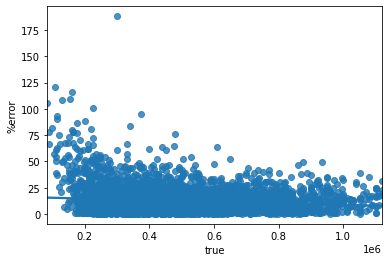

In [194]:
sns.regplot(x= results['true'], y= results['%error'])

<a id ='22' ></a>
#### Performance on Houses above 650k
Our Chosen model - 5b - Predicts house prices above 650k best as percentage errors are all below 50%.

In [206]:
results[results['true'] >= 650000 ].sort_values('resid', ascending=False)

,true,pred,resid,%error
id,,,,
7228501745,935000.0,4.758028e+05,459197.209944,49.112001
6021500970,874950.0,4.463388e+05,428611.217968,48.986938
5536100010,1050000.0,6.423323e+05,407667.676737,38.825493
9808590210,860000.0,1.261015e+06,401015.138240,46.629667
5700003221,1080000.0,7.049798e+05,375020.228961,34.724095
...,...,...,...,...
98030400,790000.0,7.902369e+05,236.932115,0.029991
1853000030,775000.0,7.752086e+05,208.576190,0.026913
7701990040,840000.0,8.399323e+05,67.723594,0.008062


Model predicts house prices between 200k and 1M reasonably okay

In [370]:
# Check percentage errors above 40
results[results['%error'] >= 40]

,true,prediction,residuals,%error
id,,,,
1105000432,224000.0,370006.040370,146006.040370,65.181268
3812400455,291000.0,415563.616389,124563.616389,42.805366
7203601405,217000.0,108034.135983,108965.864017,50.214684
2822059091,213500.0,301529.528757,88029.528757,41.231629
7893203565,120000.0,209970.012360,89970.012360,74.975010
...,...,...,...,...
4202400078,175000.0,282417.775259,107417.775259,61.381586
7518501140,300000.0,481492.860146,181492.860146,60.497620
2926049408,400000.0,645620.755697,245620.755697,61.405189


In [368]:
results[(results['true'] >= 200000) & (results['true'] <= 1000000)].sort_values('residuals', ascending=False).head(10)

,true,prediction,residuals,%error
id,,,,
3613600150,300523.0,8.662195e+05,565696.461310,188.237327
7228501745,935000.0,4.758028e+05,459197.209944,49.112001
6021500970,874950.0,4.463388e+05,428611.217968,48.986938
9808590210,860000.0,1.261015e+06,401015.138240,46.629667
682000030,610000.0,1.000731e+06,390730.935123,64.054252
3523089019,480000.0,8.432047e+05,363204.717233,75.667649
9828701565,375000.0,7.322835e+05,357283.510320,95.275603
9550200155,887200.0,5.396784e+05,347521.556956,39.170599
3023039231,650000.0,3.084925e+05,341507.507370,52.539617


Model doesn't do well for house prices below 100k

In [207]:
results[results['true'] <= 100000 ].sort_values('resid', ascending=False)

,true,pred,resid,%error
id,,,,
1523049188,84000.0,172370.013694,88370.013694,105.202397
7813200115,100000.0,181907.204517,81907.204517,81.907205
1721801591,89950.0,159830.485794,69880.485794,77.688144
2114700500,90000.0,150242.391050,60242.391050,66.935990


In [205]:
results.describe()

,true,pred,resid,%error
count,4.088000e+03,4.088000e+03,4088.000000,4088.000000
mean,4.760848e+05,4.718778e+05,56441.373027,12.520011
std,2.043052e+05,1.918313e+05,56353.214366,12.702128
min,8.400000e+04,1.080341e+05,14.938561,0.001556
25%,3.185250e+05,3.215609e+05,17154.745393,4.248177
50%,4.399900e+05,4.420778e+05,40197.536452,9.167293
75%,6.000000e+05,5.896096e+05,76135.462505,16.394658
max,1.120000e+06,1.356372e+06,565696.461310,188.237327


<a id ='23' ></a>
### Conclusion
    * After exploring several methods to improve model, we got the best model so far by:
    - removing outliers from the target variable
    - changing zipcode to categorical and dummifying it
    - extracting additonal features from the given data using longitude and latitude
    - scaling the features - base 10 log transformation for the target variable AND 
    natural log transformation for the other numerical variables.
    * Although we have reasonably explored many appraoches to improve our model from 
    the benchmark, there is always room for further improvement :)